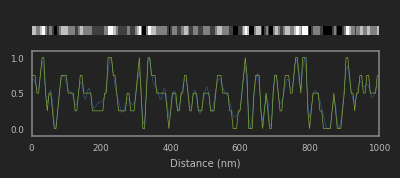

In [326]:
import numpy as np
from noise import pnoise1, pnoise3
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy import interpolate
from jupyterthemes import jtplot
jtplot.style(grid=False, fscale=0.6)
#jtplot.reset()

layer_thickness = 5.0 #in nm, we will use this throughout
num_layers = 200  # this give us a 1um thick sample    
uni = np.linspace(0, num_layers, num_layers, endpoint=False)

d_array = np.array(num_layers*[layer_thickness])


samps = int(np.random.uniform(70, 180, 1))
scales = np.random.uniform(0.05, 0.5, 1)





s = np.linspace(-1,201, samps)
fr = np.clip(np.random.normal(loc=0.5, scale=scales, size=samps), 0, 1)
fr_p = s - s
for ctr, x in enumerate(s):
    octa = np.random.uniform(1,4,1)
    pers = np.random.uniform(0.5, 2.2, 1)
    fr_p[ctr] = np.clip((0.5 + pnoise1(x, octaves=octa, persistence=pers)), 0,1)

if np.random.randint(2):
    f = interpolate.interp1d(s, fr, kind='quadratic', assume_sorted=True)
else:
    f = interpolate.interp1d(s, fr_p, kind='quadratic', assume_sorted=True)

q_x = np.clip( f(uni), 0, 1)



bins = np.array([-0.02, 0.2, 0.4, 0.6, 0.8, 1.01])
dig = (np.digitize(q_x, bins, right=True)) - 1
act_r = np.linspace(0, 1, 5, endpoint=True)
q_xd = act_r[dig]


fig = plt.subplots(2,1, figsize=(4,2))

ax = plt.subplot(211)
gratim = np.tile(q_xd, (5,1))
#ax.axis('tight')
ax.axis('off')
ax.set_axis_off()
ax.set_xlim(0,num_layers)
ax.xaxis.set_label_position('top') 
ax.xaxis.tick_top()
ax.imshow(gratim, cmap='binary_r')

ax1 = plt.subplot(212)
#ax1.imshow(gratim, cmap='binary_r')
ax1.plot(uni*5.0, q_x, linewidth=0.3 )
ax1.plot(uni*5.0, q_xd, linewidth=0.5 )
ax1.set_ylim(-0.1,1.1)
ax1.set_xlim(0,num_layers*layer_thickness)
ax1.set_xlabel('Distance (nm)')
#ax1.xaxis.set_label_position('top') 
#ax1.xaxis.tick_top()
plt.subplots_adjust(wspace=0, hspace=0)
plt.tight_layout()
#f(uni)

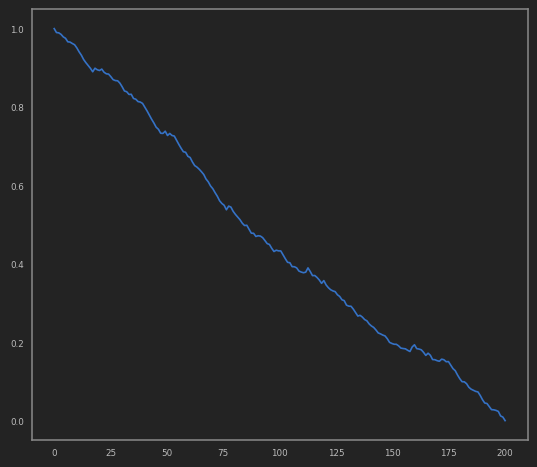

In [373]:
import numpy as np
num_layers = 200

def bet01(x):
    x = x - np.amin(x)
    x = x/np.amax(x)
    return x
    


xs = np.linspace(0, num_layers, num_layers)
poses = np.ones_like(xs)

poses[0] = 0 #np.random.uniform(-50, +50, 1)

p = random.random()
pos_counter = 0
#Start the random walk.
for i in range(1,num_layers):
    
        test = random.random()
        
        if test >= p:
            pos_counter += np.random.uniform(1,100)
        else:
            pos_counter -= np.random.uniform(1,100)

        #Fill the current position array index with the current value of the position counter from the loop.
        poses[i] = pos_counter

poses = bet01(poses)

plt.plot(xs, poses)



/home/hegder/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:86: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
/home/hegder/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:910: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/home/hegder/anaconda3/lib/python3.7/site-packages/matplotlib/rcsetup.py:156: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


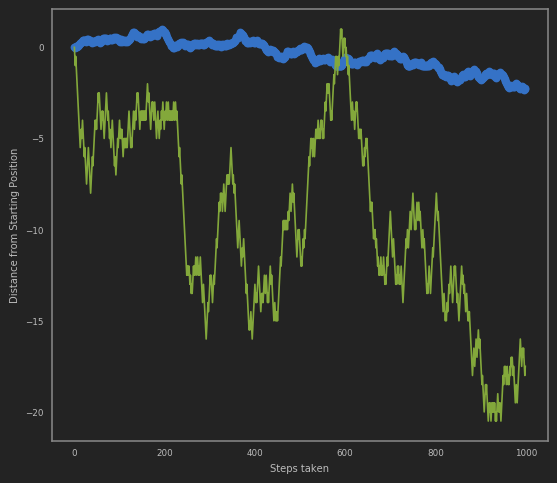

In [325]:
#The following code describes a simple 1D random walk
#where the walker can move either forwards or backwards.  There is an
#equal probability to move either forwards or backwards with each step.



#Numeric Python library
import numpy as np
import random
from matplotlib import pyplot as plt


#Number of steps.  Chosen as 50 in this case.
N_steps = 1000
prob = 0.5

def SimpleRandomWalk(N, p, line):

    #Create an array of positions for the walker.  And initialize the first position
    #to be the origin (zero).  The array will be the same size as the number of steps.
    #A position counter variable is also used, which is initialized to zero as well.
    position = np.empty(N)
    position[0] = 0
    pos_counter = 0

    #Array containing the full range of the number of possible steps taken.
    steps = np.arange(N)


    #Start the random walk.
    for i in range(1,N):


        #Generate a random probability value between 0 and 1.
        test = random.random()


        #Chechk the value of the probability generated.  If it is > or equal to 0.5, increment the step forwards.
        #If it is less than 0.5, increment a step backwards instead.  Keep track of the position counter after
        #updating it.
        if test >= p:
            pos_counter += 1
        else:
            pos_counter -= 1

        #Fill the current position array index with the current value of the position counter from the loop.
        position[i] = pos_counter



    #Generate a plot of walker position vs. the number of steps taken.  Line is a string that will describe the
    #markers and line type used to plot the random walk.
    plt.plot(steps, position/np.amax(position), line)
    plt.xlabel('Steps taken')
    plt.ylabel('Distance from Starting Position')


    return None


#Create a new figure to plot the random walk.
plt.figure()

#Function call to generate and plot the first random walk with circular markers and a dotted line.
SimpleRandomWalk(N_steps, prob, line = 'o--')


#Hold the first random walk on the plot.
plt.hold(True)


#Function call to generate and plot a second random walk using a full line.
SimpleRandomWalk(N_steps, prob, line = '-')


#Show both random walks on the plot.
plt.show()